In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

#plt.rc(usetex = True)
import numpy as np
from scipy.integrate import odeint
from scipy.interpolate import interp1d 
import functools
import scipy.interpolate
import scipy.optimize
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)


### Constants from amendola_dark_2010 and arxiv: 1208.0797

In [2]:
# -----------  constants  ----------- #

#Mp = 1.221047*(10.0**(19.0)) #in GeV, Planck mass in GeV
hbar = 1.054*(10**(-34)) #(m^2 kg s^-1)
c = 3.0 * (10.0**8.0) #m/s
G = 6.6734 * (10.0**(-11)) #m^3 kg^(-1) s^(-2)
k2 = 8.0*np.pi*G #m^(-3) kh^(-1) s^(-2)
k = np.sqrt(k2) #(m^(-3) kh^(-1) s^(-2))^(1/2))
h = 0.6774 #dimensionless hubble rate
ho = (h*(10**5))/(3.1*10**(22)) #hubble constant in s^-1
#p_crit = (3.0/k2)*(ho**2.0)  
p_crit = (3*(ho**2))/k2
po = c**(5)/(hbar*(G**2)) #Planck density in dimensions kg m^3
#M = 1.0/k #reduced planck mass

Oob = 0.0486
Oom = 0.3089 # relative energy density of matter today. In this case it consists of matter and baryons
Oor = 4.1*(10.0**(-5.0))/(h**2.0) # relative energy density of radiation today
Oode = 1.0 - Oor - Oom  # relative energy density of dark energy (Lambda) today
a_matter_rad = Oor/Oom #for matter radiation valueity for matter

rho_lambda =Oode*p_crit

#B_vals = [0,0.001,0.01,0.1,1] #fundamental constant - see chavanis dimensionless
B_max = 0.1
B_min = 0
B_n = 30
B_vals = np.linspace(B_min, B_max, B_n)
#B_vals = [0,0.1,1] #fundamental constant - see chavanis dimensionless

#B_vals = [0, 3.53e-3]
B = 0

def constant_A(B):
    return B*rho_lambda

print('Hubble rate', ho,'in seconds')
print('dimensionful critical density (kg/m^3)', p_crit)
print('Planck density (kg/m^3)', po)
print('Hubble rate (s^(-1))', ho)
print('dark matter/energy', rho_lambda)
print('gravitational constant G (m^3 kg^(-1) s^(-2))',G)

print(constant_A(3.53*1e-3)*(c**2))

Hubble rate 2.1851612903225807e-18 in seconds
dimensionful critical density (kg/m^3) 8.540852761200951e-27
Planck density (kg/m^3) 5.176918747330152e+96
Hubble rate (s^(-1)) 2.1851612903225807e-18
dark matter/energy 5.901820219977823e-27
gravitational constant G (m^3 kg^(-1) s^(-2)) 6.6734e-11
1.875008283886954e-12


### UDE Logotropic model
$$P = A\left(\frac{\rho}{\rho_{0}}\right)^{-n} \ln \left(\frac{\rho}{\rho_{0}}\right) $$ with $n \neq 0$

The case that we assess:
$$P = A \ln \left( \frac{\rho}{\rho_{Pl}}\right)$$
where the reference density is the Planck density. We take the non-relativistic limit.

$$ P = -\rho_{\Lambda}(B+1+3B\ln a)$$

In [3]:
# -----------  time array  ----------- #
Nini = -14.0
Nend = 9.0
N_points = 1000
NInc = 0.001

N = np.linspace(Nini, Nend, N_points)
N2 = np.arange(Nini, Nend, NInc)


omega_m0 = p_crit*Oom*np.exp(-3.0*Nini) #initial condition - changes dimensionless Omega in terms of density 

def rho_M(N): # energy density of matter
    return Oom * p_crit * np.exp( -3.0 * N )

def rho_r(N): # energy density of radiation
    return Oor * p_crit * np.exp( -4.0 * N )

### EoS continuity equation solution ###
def p_log(N,B):
    return -(1-Oom)*p_crit*(B+1+3*B*N)

# def eq_log(m,N):
#     return -3.0*(m+p_log(m)) #continuity equation where B = 1 chaplygin gas

# sol_log = odeint(func = eq_log, y0 = omega_m0, t = N2) #which is solved for a = -0.05 only. These solutions are then used below
#rho_log = interp1d(N2, sol_log[:,0],fill_value='extrapolate')

\begin{equation}
\epsilon= \frac{\Omega_{m,0}\epsilon_{cr}}{a^3}+\epsilon_{cr}(1-\Omega_{m,0})(1+3B\ln a).
\end{equation}
where we can let $(1-\Omega_{m,0}) = \Omega_{de,0}$

In [4]:
def rho_log(N,B):
    return Oom * p_crit * np.exp( -3 * N ) + (1-Oom)*p_crit*(1 + 3*B*N)

In [5]:
cmap = plt.get_cmap('tab20b')

normal = mpl.colors.Normalize(vmin = B_min, vmax = B_max)
scalar = plt.cm.ScalarMappable(cmap = cmap, norm = normal)

with $n=-1$ which reproduces the $\Lambda$CDM behaviour

<Figure size 432x288 with 0 Axes>

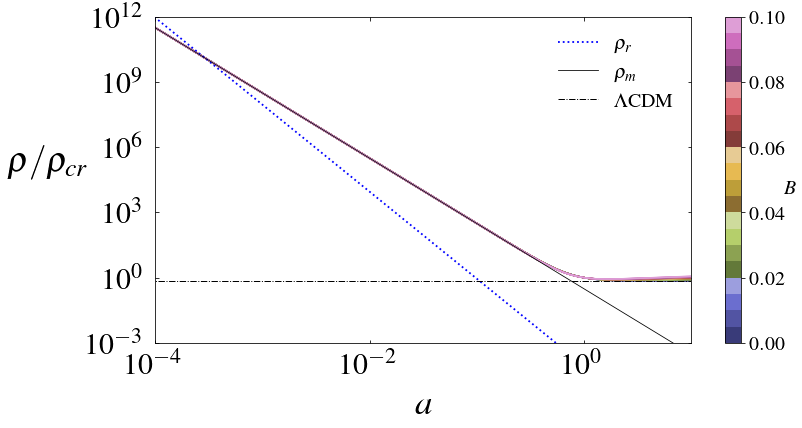

In [6]:
rho =plt.figure()
fig,ax = plt.subplots(figsize=(12,6))

for B in B_vals:
    ax.plot(np.exp(N),rho_log(N,B)/p_crit, linestyle = '-',color = cmap((B - B_min)/(B_max - B_min)))
    
ax.plot(np.exp(N),rho_r(N)/p_crit,label = r'$\rho_r$',color = 'b', linewidth = 1.8, linestyle = ':')
ax.plot(np.exp(N),rho_M(N)/p_crit,label = r'$\rho_m$', color='k', linewidth = 0.8)

ax.plot(np.exp(N),(rho_lambda/p_crit*(N/N)), label = r'$\Lambda$CDM', color = 'k',linewidth = 1., linestyle = '-.')

# -----------  Plot specs  ----------- #
color_bar = fig.colorbar(scalar, ticks = np.linspace(B_min, B_max, 6), pad = 0.05)
#color_bar.formatter.set_powerlimits((0,0))
color_bar.set_label(r'$B$',rotation = 0, size = 20)
color_bar.ax.tick_params(labelsize = 20,pad = 5)
ax.tick_params(direction="in")
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)
ax.tick_params(which='major', direction="in",pad=10)
ax.tick_params(which='minor', direction="in",pad=5)
ax.tick_params(axis='x', which='major', pad=10)
ax.tick_params(axis='y', which='minor', pad=5)
ax.tick_params(which='both', direction='in')

plt.minorticks_on()
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))

ax.set_xlabel(r'$a$', fontsize = 35, labelpad = 10)
ax.set_ylabel(r'$\rho/\rho_{cr}$',fontsize = 35, rotation = 0,labelpad=40)
plt.legend(frameon = False, fontsize = 20)

plt.xlim(1e-4, 1e1)
plt.ylim(1e-3, 1e12)
plt.xscale('log')
plt.yscale('log')

#ax.figure.savefig("rho_m_logo.pdf", bbox_inches='tight', transparent=True)

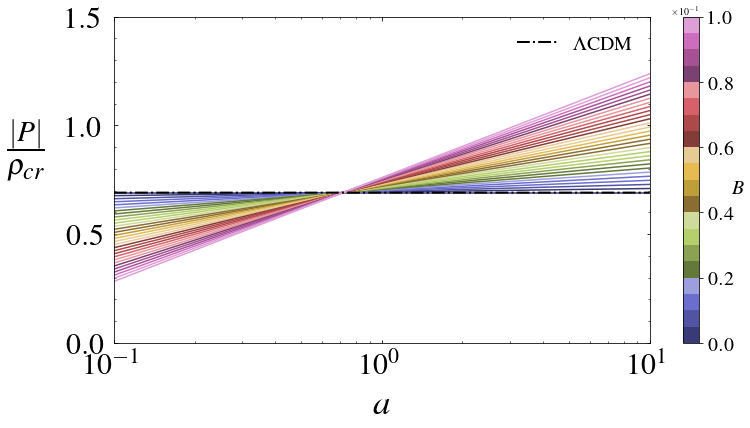

In [7]:
#P=plt.figure()
fig, ax = plt.subplots(figsize=(12,6))
#fig,ax = P.add_subplot(111)

for B in B_vals:
    ax.plot(np.exp(N),(np.abs(p_log(N,B)))/p_crit, linestyle = '-', color = cmap((B - B_min)/(B_max - B_min)))
    
#ax.plot(np.exp(N2),(rho_lambda/p_crit*(N2/N2)), label = r'$\Lambda$CDM', color = 'k',linewidth = 1., linestyle = '-.')
ax.plot(np.exp(N2),(rho_lambda/p_crit*(N2/N2)), label = r'$\Lambda$CDM', color = 'k',linewidth = 2., linestyle = '-.')

#plt.axvline(x=a_matter_rad**(1),color = 'k', linestyle = "--", linewidth = 0.5, label = r'$\Omega_r / \Omega_m$') #for matter radiation equality
#plt.axvline(x=1e0,color = 'r', linestyle = "--", linewidth = 0.5) #for matter radiation equality

# -----------  Plot specs  ----------- #
color_bar = fig.colorbar(scalar, ticks = np.linspace(B_min, B_max, 6), pad = 0.05)
color_bar.formatter.set_powerlimits((0,0))
color_bar.set_label(r'$B$',rotation = 0, size = 20)
color_bar.ax.tick_params(labelsize = 20,pad = 5)
ax.tick_params(direction="in")
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)
ax.tick_params(which='major', direction="in",pad=10)
ax.tick_params(which='minor', direction="in",pad=5)
ax.tick_params(axis='x', which='major', pad=10)
ax.tick_params(axis='y', which='minor', pad=5)
#ax.tick_params(which='both', direction='in')
plt.minorticks_on()

ax.set_xlabel(r'$a$', fontsize = 35, labelpad = 10)
ax.set_ylabel(r'$\frac{|P|}{\rho_{cr}}$',fontsize = 40, rotation = 0, labelpad=40)
#plt.xlim(1e-2, 1e0)
plt.legend(frameon = False, fontsize = 20)
plt.xscale('log')
plt.xlim(1e-1,1e1)
plt.ylim(0,1.5)
ax.figure.savefig("P_logo.pdf", bbox_inches='tight', transparent=True)

<Figure size 432x288 with 0 Axes>

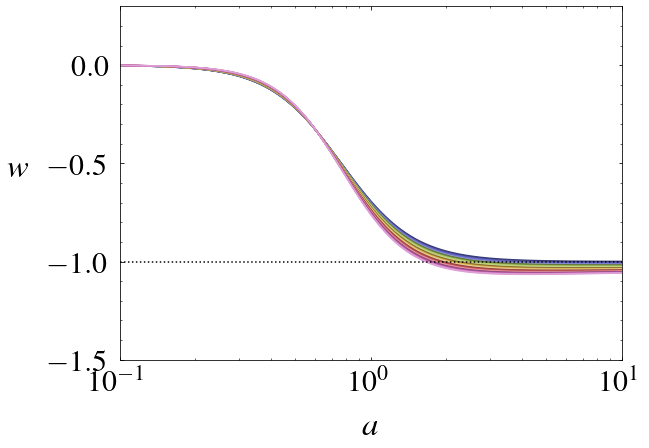

In [8]:
w_log = plt.figure()
fig,ax = plt.subplots(figsize=(9,6.5))

def w_log(N,B):
    return - (1-Oom)*(1+B+3*B*N)/(Oom*np.exp(-3*N)+(1-Oom)*(1+3*B*N))

for B in B_vals:
    ax.plot(np.exp(N), w_log(N,B), linestyle = '-',color = cmap((B - B_min)/(B_max - B_min)) )

#ax.axvline(x=1e0,lw=1.5,c='k',ls=':',label = r'$a=1$')
ax.axhline(y=-1,c='k',ls=':')


# -----------  Plot specs  ----------- #
#color_bar = fig.colorbar(scalar, ticks = np.linspace(B_min, B_max, 6), pad = 0.07)
#color_bar.formatter.set_powerlimits((0,0))
#color_bar.set_label(r'$B$',rotation = 0, size = 20)
#color_bar.ax.tick_params(labelsize = 20,pad = 5)
ax.tick_params(direction="in")
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)
ax.tick_params(which='major', direction="in",pad=10)
ax.tick_params(which='minor', direction="in",pad=5)
ax.tick_params(axis='x', which='major', pad=10)
ax.tick_params(axis='y', which='minor', pad=5)
ax.tick_params(which='both', direction='in')
plt.minorticks_on()

plt.ylabel(r'$w$',usetex=True,fontsize=33,labelpad=30,rotation=0)
plt.xlabel(r'$a$', usetex=True,fontsize=33,labelpad=15)
#plt.legend(frameon = False, fontsize = 20)

#plt.xlim(1e-2,1e1)
#plt.xlim(0,1)
plt.ylim(-1.5,0.3)

plt.xlim(1e-1,1e1)
plt.xscale('log')
ax.figure.savefig("w_logo.pdf", bbox_inches='tight', transparent=True)

-0.53665 deceleration parameter current day


<Figure size 432x288 with 0 Axes>

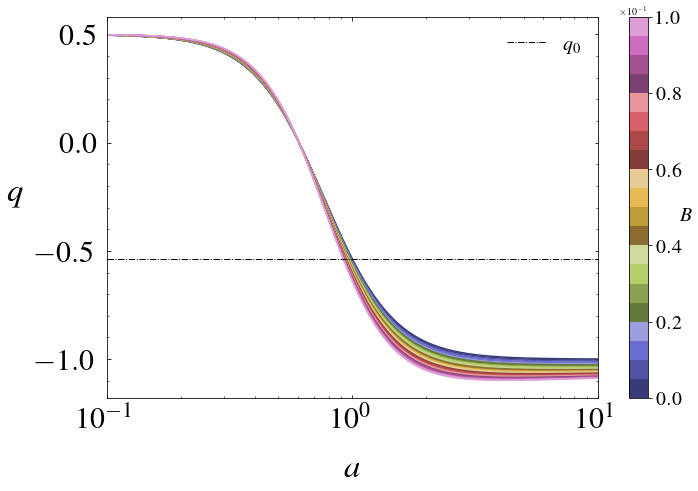

In [9]:
q=plt.figure()
fig,ax = plt.subplots(figsize=(11,7))

def q_dec(N,B):
    return (1/2)*(1+3*w_log(N,B))

for B in B_vals:
    ax.plot(np.exp(N),q_dec(N,B), linestyle = '-',color = cmap((B - B_min)/(B_max - B_min)) )
    
#ax.plot(np.exp(N), q_dec(N,B),'k-',lw=1.5, label=r'UDE, $A=  10^{-5}\rho_c$, $B = $'+str(B))

#ax.axvline(x=1e0,lw=1.5,c='k',ls=':', label = r'$a=1$')
#q_0 = 1/2  - (3/2)*Oode
q_0 = -1 + 3*(Oom)/2
print(q_0,'deceleration parameter current day')

ax.axhline(y= q_0,color = 'k',linewidth = 1., linestyle = '-.',label=r'$q_0$')
#ax.axhline(y=0.5,c='k',ls=':')


# -----------  Plot specs  ----------- #
color_bar = fig.colorbar(scalar, ticks = np.linspace(B_min, B_max, 6), pad = 0.05)
color_bar.formatter.set_powerlimits((0,0))
color_bar.set_label(r'$B$',rotation = 0, size = 20)
color_bar.ax.tick_params(labelsize = 20,pad = 5)
ax.tick_params(direction="in")
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)
ax.tick_params(which='major', direction="in",pad=10)
ax.tick_params(which='minor', direction="in",pad=5)
ax.tick_params(axis='x', which='major', pad=10)
ax.tick_params(axis='y', which='minor', pad=5)
ax.tick_params(which='both', direction='in')
plt.minorticks_on()

plt.ylabel(r'$q$',usetex=True,fontsize=33,labelpad=20,rotation=0)
plt.xlabel(r'$a$', usetex=True,fontsize=33,labelpad=20)
plt.legend(frameon = False, fontsize = 20)

#plt.xlim(0,1)
plt.xlim(1e-1,1e1)
plt.xscale('log')

/tmp/ipykernel_16479/1118671228.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return ((Oom*np.exp(-3*N))/(B*(Oode))-1)**(-1)


<Figure size 432x288 with 0 Axes>

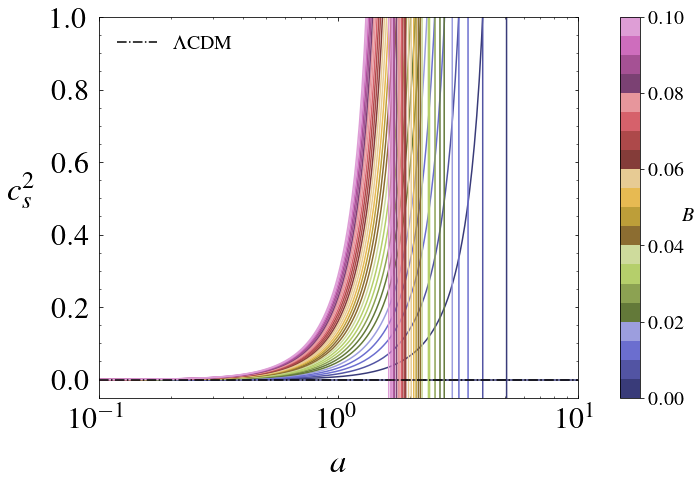

In [10]:
cs2 = plt.figure()
fig,ax = plt.subplots(figsize=(11,7))

def cs2_log(N,B):
    return B/((rho_log(N,B)/po)-1)

def cs2_log(N,B):
    return ((Oom*np.exp(-3*N))/(B*(Oode))-1)**(-1)

# def cs2_log(N,B):
#     return 1/(rho_log(N,B)/constant_A(B) - 1)

# def cs2_log(N,B):
#     return constant_A(B)/rho_log(N,B)

for B in B_vals:
    ax.plot(np.exp(N),cs2_log(N,B), linestyle = '-',color = cmap((B - B_min)/(B_max - B_min)) )
#ax.plot(np.exp(N), cs2(N,B),'k-',lw=1.5, label=r'UDE, $A=  10^{-5}\rho_c$, $\B = $'+str(B))

#ax.axvline(x=1e0,lw=1.5,c='k',ls=':',label = r'$a=1$')
ax.axhline(y=0,c='k',ls='-.',label=r'$\Lambda $CDM')


# -----------  Plot specs  ----------- #
color_bar = fig.colorbar(scalar, ticks = np.linspace(B_min, B_max, 6), pad = 0.07)
#color_bar.formatter.set_powerlimits((0,0))
color_bar.set_label(r'$B$',rotation = 0, size = 20)
color_bar.ax.tick_params(labelsize = 20,pad = 5)
ax.tick_params(direction="in")
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)
ax.tick_params(which='major', direction="in",pad=10)
ax.tick_params(which='minor', direction="in",pad=5)
ax.tick_params(axis='x', which='major', pad=10)
ax.tick_params(axis='y', which='minor', pad=5)
ax.tick_params(which='both', direction='in')
plt.minorticks_on()

plt.ylabel(r'$c_s^2$',usetex=True,fontsize=33,labelpad=30,rotation=0)
plt.xlabel(r'$a$', usetex=True,fontsize=33,labelpad=15)
plt.legend(frameon = False, fontsize = 20)

plt.xlim(1e-1,1e1)
#plt.xlim(0,1)
#plt.xlim(0,1)
plt.ylim(-0.05,1)
plt.xscale('log')
#ax.figure.savefig("s_logo_current_day.pdf", bbox_inches='tight', transparent=True)


### Problems with the sound speed, imaginery post $a_M$

Note: https://arxiv.org/abs/1505.00034

We have differing sounds speeds, $\epsilon$ for total density and $\rho$ for the matter only era i.e. assuming that the matter era starts at $a=10^{-4}$, corresponding to the epoch of matter-radiation equality. Thus making the equality 

$$c_s^2 = P'(\rho)$$

thus we have limitations on where we defined our sound speed: $a<a_M$ (



real), $a>a_M$ (imaginery)

/tmp/ipykernel_16479/3241466812.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  return ((Oom*np.exp(-3*N))/(B*(Oode))-1)**(-1)


(0.0, 0.8)

<Figure size 432x288 with 0 Axes>

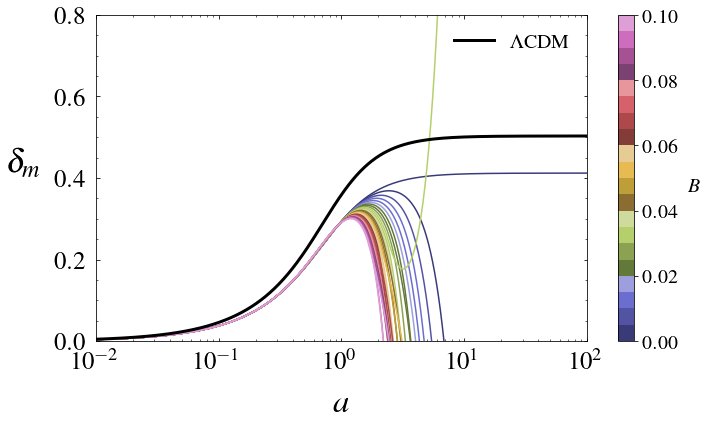

In [11]:
delta = plt.figure()
fig,ax = plt.subplots(figsize=(11,6))

# -----------  initial conditions  ----------- #
z_LSS = 1089

Nini = -np.log( 1 + z_LSS)
Nend = 5
N = np.linspace(Nini, Nend, N_points)

z0 = 0.7*1e-3
dz0 = 0.0

ICs = [z0,dz0]

def rho_prime(N):
    return -rho_M(N)

# def s(N,B):
#     return B/((rho_log(N,B)/po)-1)#sound speed

# def s(N,B):
#     return constant_A(B)/rho_log(N,B)

def s(N,B):
    return ((Oom*np.exp(-3*N))/(B*(Oode))-1)**(-1)

def s_prime(N,B):
    return B*po*rho_prime(N)/((po - rho_M(N))**2)

def H_prime_UDE(N,B):
    return -(3/2)*(1+w_log(N,B))

def Omega_ude(N,B):
    return (rho_M(N)) / (rho_log(N,B)+rho_r(N))

def f(N,B):
    return 3/2 * (1 + 3*s(N,B))*Omega_ude(N,B)

# -----------  solve differential equations  ----------- #

def eqs(var, N,B): # define diferential equations to be solved. here z is delta and dz is delta'
    z,dz = var
    eqs = [dz,
           - dz * (3* s(N,B) + 2 + H_prime_UDE(N,B)) - z * (3*s_prime(N,B) + 3*s(N,B)*(2+H_prime_UDE(N,B))-f(N,B))]
    return eqs 

for B in B_vals:
    sol = odeint(eqs, ICs, N, args = (B,)) # solve equations using odeind
    ax.plot(np.exp(N),sol[:,0], linestyle = '-',color = cmap((B - B_min)/(B_max - B_min)))
    
# -----------  LCDM case  ----------- #
cs2_LCDM = 0
cs2_prime_LCDM = 0

def w_LCDM(N):
    return -(Oode)/(Oom*np.exp(-3*N)+Oode)

def H_prime(N):
    return -(3/2)*(1+w_LCDM(N))

def Omega_m(N):
    return rho_M(N)/ (rho_M(N)+rho_lambda)

def f_LCDM(N):
    return (3/2) * Omega_m(N)

# -----------  solve differential equations  ----------- #

def delta_main(var,N):
    z,dz = var
    eqs = [dz,
           - dz * (3* cs2_LCDM + 2 + H_prime(N)) - z * (3*cs2_prime_LCDM + 3*cs2_LCDM*(2+H_prime(N))-f_LCDM(N)) ]
    return eqs

sol_LCDM = odeint(delta_main, ICs, N) # solve equations using odeind

plt.plot(np.exp(N),(sol_LCDM[:,0]),'k-',lw=3,label = r'$\Lambda$CDM')

# -----------  Plot specs  ----------- #

color_bar = fig.colorbar(scalar, ticks = np.linspace(B_min, B_max, 6), pad = 0.05)
#color_bar.formatter.set_powerlimits((0,0))
color_bar.ax.tick_params(labelsize=20)
# ax.set(xticks=[], yticks=[])
# color_bar.ax.yaxis.get_offset_text().set(size=20)
color_bar.set_label(r'$B$',rotation = 0, size = 20, labelpad = 15)
color_bar.ax.tick_params(labelsize = 20,pad = 5)
ax.tick_params(direction="in")
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)
ax.tick_params(which='major', direction="in",pad=10)
ax.tick_params(which='minor', direction="in",pad=5)
ax.tick_params(axis='x', which='major', pad=10)
ax.tick_params(axis='y', which='minor', pad=5)
ax.tick_params(which='both', direction='in')

plt.minorticks_on()

plt.ylabel(r'$\delta_m$',usetex=True,fontsize=33,labelpad=30,rotation=0)
plt.xlabel(r'$a$', usetex=True,fontsize=33,labelpad=15)
plt.xscale('log')
plt.legend(frameon = False, fontsize = 20)
plt.xlim(1e-2, 1e2)
plt.ylim(0,.8)


/tmp/ipykernel_16479/3241466812.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  return ((Oom*np.exp(-3*N))/(B*(Oode))-1)**(-1)


<Figure size 432x288 with 0 Axes>

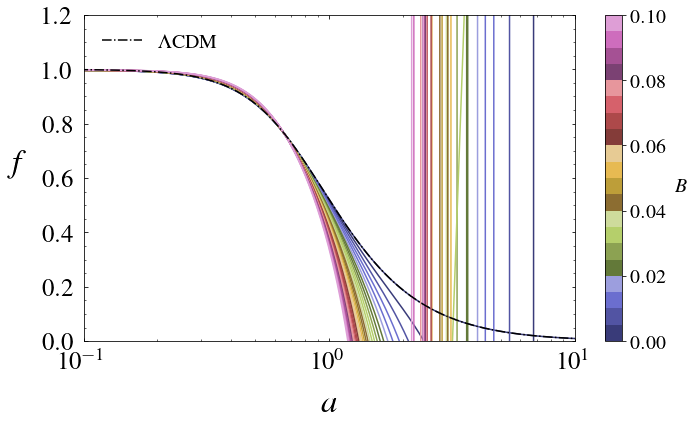

In [12]:
growth_f = plt.figure()
fig,ax = plt.subplots(figsize=(11,6))

for B in B_vals:
    sol = odeint(eqs, ICs, N, args = (B,)) # solve equations using odeind
    ax.plot(np.exp(N),sol[:,1]/sol[:,0], linestyle = '-',color = cmap((B - B_min)/(B_max - B_min)))
    
    
ax.plot(np.exp(N),sol_LCDM[:,1]/sol_LCDM[:,0],c='k',ls='-.',label=r'$\Lambda $CDM', linewidth=1.5)

# -----------  Plot specs  ----------- #
color_bar = fig.colorbar(scalar, ticks = np.linspace(B_min, B_max, 6), pad = 0.05)
#color_bar.formatter.set_powerlimits((0,0))
color_bar.ax.tick_params(labelsize=20)
# ax.set(xticks=[], yticks=[])
# color_bar.ax.yaxis.get_offset_text().set(size=20)
color_bar.set_label(r'$B$',rotation = 0, size = 20, labelpad = 15)
color_bar.ax.tick_params(labelsize = 20,pad = 5)
ax.tick_params(direction="in")
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)
ax.tick_params(which='major', direction="in",pad=10)
ax.tick_params(which='minor', direction="in",pad=5)
ax.tick_params(axis='x', which='major', pad=10)
ax.tick_params(axis='y', which='minor', pad=5)
ax.tick_params(which='both', direction='in')

plt.minorticks_on()
#ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
#plt.axhline(y=0)
plt.ylabel(r'$f$',usetex=True,fontsize=33,labelpad=30,rotation=0)
plt.xlabel(r'$a$', usetex=True,fontsize=33,labelpad=15)
plt.legend(frameon = False, fontsize = 20)

#plt.xlim(0,1)
plt.xlim(1e-1,1e1)
plt.ylim(0.,1.2)
plt.xscale('log')
#ax.figure.savefig("f_logo_current.pdf", bbox_inches='tight', transparent=True)

/tmp/ipykernel_16479/3241466812.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  return ((Oom*np.exp(-3*N))/(B*(Oode))-1)**(-1)
/tmp/ipykernel_16479/3806494685.py:6: RuntimeWarning: divide by zero encountered in log
  gamma = np.log(sol[:,1]/sol[:,0])/np.log(Omega_ude(N,B))
/tmp/ipykernel_16479/3806494685.py:6: RuntimeWarning: divide by zero encountered in log
  gamma = np.log(sol[:,1]/sol[:,0])/np.log(Omega_ude(N,B))
/tmp/ipykernel_16479/3806494685.py:6: RuntimeWarning: divide by zero encountered in log
  gamma = np.log(sol[:,1]/sol[:,0])/np.log(Omega_ude(N,B))
/tmp/ipykernel_16479/3806494685.py:6: RuntimeWarning: divide by zero encountered in log
  gamma = np.log(sol[:,1]/sol[:,0])/np.log(Omega_ude(N,B))
/tmp/ipykernel_16479/3806494685.py:6: RuntimeWarning: divide by zero encountered in log
  gamma = np.log(sol[:,1]/sol[:,0])/np.log(Omega_ude(N,B))
/tmp/ipykernel_16479/3806494685.py:6: RuntimeWarning: divide by zero encountered in log
  gamma = np.log(sol[:,1]/so

(0.1, 1.0)

<Figure size 432x288 with 0 Axes>

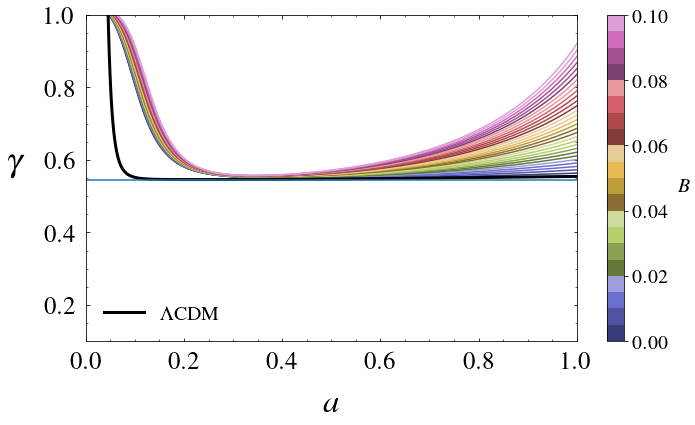

In [13]:
growth_gamma = plt.figure()
fig,ax = plt.subplots(figsize=(11,6))
old = np.seterr(invalid='ignore')
for B in B_vals:
    sol = odeint(eqs, ICs, N, args = (B,)) # solve equations using odeind
    gamma = np.log(sol[:,1]/sol[:,0])/np.log(Omega_ude(N,B))
    ax.plot(np.exp(N),gamma, linestyle = '-',color = cmap((B - B_min)/(B_max - B_min)))

    
ax.plot(np.exp(N),np.log(sol_LCDM[:,1]/sol_LCDM[:,0])/np.log(Omega_m(N)),'k-',lw=3,label = r'$\Lambda$CDM')

#ax.axhline(y=(6/11),lw=1.5,c='r',ls='--',label = r' Approx. solution ($\gamma = 6/11$)')

# -----------  Plot specs  ----------- #
color_bar = fig.colorbar(scalar, ticks = np.linspace(B_min, B_max, 6), pad = 0.05)
#color_bar.formatter.set_powerlimits((0,0))
color_bar.ax.tick_params(labelsize=20)
# ax.set(xticks=[], yticks=[])
# color_bar.ax.yaxis.get_offset_text().set(size=20)
color_bar.set_label(r'$B$',rotation = 0, size = 20, labelpad = 15)
color_bar.ax.tick_params(labelsize = 20,pad = 5)
ax.tick_params(direction="in")
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)
ax.tick_params(which='major', direction="in",pad=10)
ax.tick_params(which='minor', direction="in",pad=5)
ax.tick_params(axis='x', which='major', pad=10)
ax.tick_params(axis='y', which='minor', pad=5)
ax.tick_params(which='both', direction='in')

plt.minorticks_on()
#ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
plt.axhline(y=6/11)
plt.ylabel(r'$\gamma$',usetex=True,fontsize=33,labelpad=30,rotation=0)
plt.xlabel(r'$a$', usetex=True,fontsize=33,labelpad=15)
plt.legend(frameon = False, fontsize = 20)

ax.set_xlim(0,1.0)
ax.set_ylim(0.1,1)

### Using Newtonian gauge including Fourier modes

In [14]:
def H2(N,B):
    return (k2/3.0)*(rho_log(N,B)+rho_r(N)) #including radiation

def omega(N):
    return p_log(rho_log(N))/rho_log(N) #background

def cs2(N):
    return Lambda/rho_log(N) #sound speed

def xi(N):
    return -3/2*(1+omega(N))

Nini = -14.0
Nend = 14.0
N_points = 1000

mode = 0.1

N = np.linspace(Nini, Nend, N_points)

def delta(var,N):
    x,y = var
    return [y,
            -y*(2.0+3.0*cs2(N)-6.0*omega(N)-xi(N))+
            x*((3.0/2.0)*(1.0-6.0*cs2(N)-3.0*omega(N)**(2.0)+8.0*omega(N)) -cs2(N)*mode*mode/H2(N)*(np.exp(2.0*N)))]

z0 = 0.7*10.0 ** ( -3.0 )
dz0 = 0.0

ICs = [z0,dz0]

# sol_delta = odeint(delta, ICs, N) # solve equations using odeint

# delta_sol = interp1d(N, sol_delta[:,0],fill_value='extrapolate')

In [15]:
def f_dot(f, N):
    return - f*(2.0+3.0*cs2_log(N)-6.0*omega(N)-xi(N)) + ((3.0/2.0)*(1.0-6.0*cs2(N)-3.0*omega(N)**(2.0)+8.0*omega(N)) )

# sol_f = odeint(func = f_dot, y0 = 1, t = N2) #which is solved for a = -0.05 only. These solutions are then used below
# f_sol = interp1d(N2, sol_f[:,0],fill_value='extrapolate')

# f_plot = plt.figure(figsize = (10,7))

# plt.plot(np.exp(N),(f_sol(N)), 'k--', linewidth = 0.7,label = r'$\Lambda$ = 0.6, $B = 1$')

# plt.xlim(0, 1)
# plt.ylabel(r'$f_{UDE}$', fontsize = 20)
# plt.xlabel(r'$a$', fontsize = 20)
# #plt.xscale('log')
# #plt.yscale('log')

# plt.legend(fontsize = 15)

In [16]:
# fig, ax = plt.subplots(figsize=[9, 6])

# def s(N):
#     return constant_A(B)/(rho_log(N,B)-1) #sound speed

# #ax.plot(np.exp(N2),w(N2),'k-',lw=1.5, label=r'$w$, $n=0$')
# for B in B_vals:
#     ax.plot(np.exp(N2),s(N2),lw=1.5)

# #ax.axvline(x=1e0,lw=1.5,c='k',ls=':')
# ax.axhline(y=0,c='r',ls=':',label=r'$\Lambda CDM$')

# #plt.ylabel(r'$c_s^2$',usetex=True,fontsize=33,labelpad=20)
# plt.xlabel(r'$a$', usetex=True,fontsize=33,labelpad=20)
# plt.xlim(1e-2, 1e1)
# plt.ylim(-1.1, 1.1)

# ax.yaxis.set_ticks_position('both')
# ax.xaxis.set_ticks_position('both')
# ax.tick_params(which='both', direction='in')
# ax.tick_params(which='major', direction="in",pad=7)
# ax.tick_params(which='minor', direction="in")
# plt.legend(fontsize = 20, loc=2,frameon=False)

# plt.xscale('log')
# ax.xaxis.set_tick_params(labelsize=30)
# ax.yaxis.set_tick_params(labelsize=30)


# # inset axes....
# axins = ax.inset_axes([0.6, 0.55, 0.3, 0.4])
# axins.plot(np.exp(N2), s(N2),'r-', lw = 1.)
# axins.axhline(y=0,c='r',ls=':')

# #axins.plot(np.exp(N2), w(N2),'k-', lw = 1.)

# # # subregion of the original image
# x1, x2, y1, y2 = 0.12,0.22, -0.19, 0.19
# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)
# axins.set_xticks([])
# axins.set_yticks([])
# #plt.text(0.12,0.6,r'$a_M$')

# ax.indicate_inset_zoom(axins, edgecolor="black")

#plt.savefig('cs2_w_log.pdf', bbox_inches='tight',transparent= True)